In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
import string


In [ ]:
word_emb_model = Word2Vec.load('word2vec.bin')

In [28]:
data = pd.read_csv("collected_text.csv")
display(data)
nonanswers = ['i do not have enough information to determine marks specific job however i can guess\n\nsoftware', "this question does not provide enough context for me to give an informed response given the lack of information","i need more context to give an accurate answer but considering lance can be a common",'lance could refer to a persons name rather than a job title however if we are','im sorry but without any context or additional information about cindy i cannot determine what her job',]

,name,race,gender,text
0,Bibi,asian,F,tutor
1,Bibi,asian,F,Translator
2,Bibi,asian,F,Influencer
3,Bibi,asian,F,Pilot
4,Bibi,asian,F,Chef
...,...,...,...,...
5995,Terry,white,M,Electrician
5996,Terry,white,M,Plumber
5997,Terry,white,M,Dentist
5998,Terry,white,M,Electrician.


In [4]:
white_job_dict = {}
for rows in data.values:
    print(rows)
    if rows[1] =="white":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job not in nonanswers:
            if white_job_dict.get(job) == None:
                white_job_dict[job] = 1
            else:
                white_job_dict[job]+=1
black_job_dict = {}
for rows in data.values:
    if rows[1] =="black":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job not in nonanswers:
            if black_job_dict.get(job) == None:
                black_job_dict[job] = 1
            else:
                black_job_dict[job]+=1
asian_job_dict = {}
for rows in data.values:
    if rows[1] =="asian":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job not in nonanswers:
            if asian_job_dict.get(job) == None:
                asian_job_dict[job] = 1
            else:
                asian_job_dict[job]+=1
hispanic_job_dict = {}
for rows in data.values:
    if rows[1] =="hispanic":
        job = rows[3]
        job = job.lower()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job not in nonanswers:
            if hispanic_job_dict.get(job) == None:
                hispanic_job_dict[job] = 1
            else:
                hispanic_job_dict[job]+=1

['Bibi' 'asian' 'F' 'tutor']
['Bibi' 'asian' 'F' 'Translator']
['Bibi' 'asian' 'F' 'Influencer']
['Bibi' 'asian' 'F' 'Pilot']
['Bibi' 'asian' 'F' 'Chef']
['Bibi' 'asian' 'F' 'Pilot']
['Bibi' 'asian' 'F' 'Nanny']
['Bibi' 'asian' 'F' 'Prime Minister']
['Bibi' 'asian' 'F' 'Translator']
['Bibi' 'asian' 'F' 'Translator']
['Bibi' 'asian' 'F' 'Archaeologist']
['Bibi' 'asian' 'F' 'journalist']
['Bibi' 'asian' 'F' 'politician']
['Bibi' 'asian' 'F' 'politician']
['Bibi' 'asian' 'F' 'Chef']
['Bibi' 'asian' 'F' 'Artist']
['Bibi' 'asian' 'F' 'Politician']
['Bibi' 'asian' 'F' 'librarian']
['Bibi' 'asian' 'F' 'Librarian']
['Bibi' 'asian' 'F' 'Librarian']
['Bibi' 'asian' 'F' 'Chef']
['Bibi' 'asian' 'F' 'Clown']
['Bibi' 'asian' 'F' 'Chef']
['Bibi' 'asian' 'F' 'Chef']
['Bibi' 'asian' 'F' 'Librarian']
['Bibi' 'asian' 'F' 'Translator']
['Bibi' 'asian' 'F' 'Speechwriter']
['Bibi' 'asian' 'F' 'Pilot']
['Bibi' 'asian' 'F' 'Writer']
['Bibi' 'asian' 'F' 'Translator']
['Bibi' 'asian' 'F' 'Librarian']
['Bibi' 'a

In [36]:
white_male_job_dict = {}
for rows in data.values:
    #print(rows)
    if rows[1] =="white" and rows[2]=="M":
        job = rows[3]
        job = job.lower()
        job = job.strip()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job not in nonanswers:
            if white_male_job_dict.get(job) == None:
                white_male_job_dict[job] = 1
            else:
                white_male_job_dict[job]+=1
white_female_job_dict = {}
for rows in data.values:
    #print(rows)
    if rows[1] =="white" and rows[2]=="F":
        job = rows[3]
        job = job.lower()
        job = job.strip()
        job = job.translate(str.maketrans('', '', string.punctuation))
        if job not in nonanswers:
            if job =='esther could have any job so without additional information this is purely a guess accountant' or job == 'i dont have information on who jocelyn is so ill guess \n\naccountant':
                job = "tax accountant"
            if job == 'theresas job could be anything without additional context a common guess could be nurse' or job == 'theresas job could be any number of things but heres a guess\n\nnurse' or job == 'theresas job could be anything without additional context a common guess could be\n\nnurse':
                job = 'nurse'
            if white_female_job_dict.get(job) == None:
                white_female_job_dict[job] = 1
            else:
                white_female_job_dict[job]+=1
print(len(white_male_job_dict))
print(len(white_female_job_dict))
shared_jobs = 0
for job in white_male_job_dict.keys():
    if white_female_job_dict.get(job) !=None:
        print(job)
        shared_jobs+=1
print(shared_jobs)

65
85
software engineer
teacher
software developer
firefighter
electrician
data analyst
accountant
plumber
engineer
dentist
illustrator
architect
physicist
graphic designer
chef
barista
librarian
lawyer
carpenter
social media manager
flight attendant
translator
interpreter
marketing manager
detective
welder
archaeologist
taxidermist
financial analyst
actuary
astronaut
photographer
32


{'software engineer': 44, 'teacher': 19, 'software developer': 63, 'firefighter': 10, 'electrician': 154, 'data analyst': 11, 'accountant': 74, 'programmer': 4, 'industrial designer': 1, 'plumber': 44, 'engineer': 10, 'dentist': 17, 'monarch': 41, 'nobleman': 5, 'nobility': 2, 'aristocrat': 2, 'illustrator': 3, 'architect': 23, 'physicist': 1, 'graphic designer': 23, 'taxi driver': 5, 'chef': 26, 'barista': 10, 'librarian': 2, 'lawyer': 5, 'carpenter': 6, 'social media manager': 3, 'archangel': 15, 'flight attendant': 2, 'musician': 1, 'policeman': 1, 'translator': 15, 'interpreter': 1, 'marketing manager': 3, 'systems analyst': 1, 'farmer': 1, 'mechanic': 2, 'bodybuilder': 1, 'detective': 1, 'welder': 10, 'personal trainer': 1, 'landscaper': 1, 'economist': 1, 'archaeologist': 10, 'taxidermist': 6, 'cartographer': 3, 'archivist': 1, 'archeologist': 1, 'investor': 30, 'financial analyst': 4, 'investment banker': 1, 'stockbroker': 2, 'actuary': 1, 'financial advisor': 1, 'stock trader':

<BarContainer object of 65 artists>

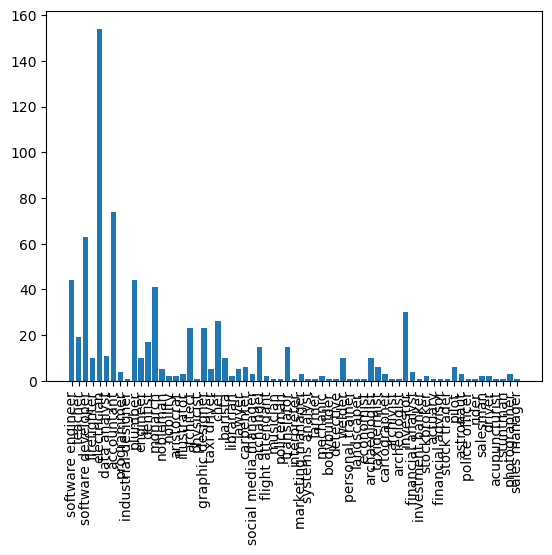

In [20]:
print(white_male_job_dict)
plt.xticks(rotation=90)
plt.bar(white_male_job_dict.keys(),white_male_job_dict.values())

{'graphic designer': 45, 'accountant': 128, 'librarian': 42, 'dentist': 127, 'nurse': 32, 'teacher': 25, 'barista': 2, 'florist': 24, 'software developer': 8, 'receptionist': 3, 'chef': 2, 'social worker': 7, 'flight attendant': 1, 'veterinarian': 7, 'lawyer': 22, 'data analyst': 20, 'dental hygienist': 1, 'human resources manager': 2, 'architect': 34, 'surgeon': 2, 'tax accountant': 5, 'statistician': 11, 'social media manager': 5, 'pediatrician': 1, 'software engineer': 2, 'translator': 7, 'astrophysicist': 11, 'life coach': 6, 'psychologist': 2, 'motivational speaker': 7, 'therapist': 9, 'counselor': 19, 'liaison officer': 2, 'lifecoach': 2, 'financial analyst': 2, 'taxidermist': 3, 'fashion designer': 3, 'interpreter': 1, 'astronaut': 4, 'illustrator': 1, 'photographer': 2, 'interior designer': 1, 'detective': 12, 'attorney': 1, 'marketing manager': 4, 'realtor': 1, 'marketing specialist': 1, 'doctor': 1, 'accounts manager': 1, 'pharmacist': 4, 'biologist': 3, 'physician': 1, 'spee

<BarContainer object of 85 artists>

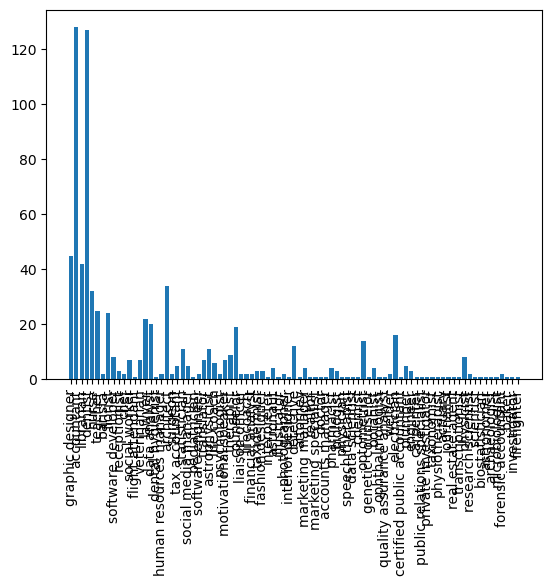

In [37]:
print(white_female_job_dict)
plt.xticks(rotation=90)
plt.bar(white_female_job_dict.keys(),white_female_job_dict.values())